# Digit classification

## Importing packeges and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

## Importing the data

In [2]:
dc_train = pd.read_csv("C:\\AAU\\miniproject\\train.csv")
dc_test = pd.read_csv("C:\\AAU\\miniproject\\test.csv")
sub = pd.read_csv("C:\\AAU\\miniproject\\sample_submission.csv")

### Exploring the Dataset

In [3]:
# Printing out what information is stored in the tables
print(dc_train)
print(dc_test)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [4]:
# Here we see that the training-set has the label column,784 pixel columns, and 42,000 rows, which contain the pixel values
# The test-set is very simular, with the difference that there is no label column and there are 28,000 rows

In [5]:
dc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
# Removing the label column from the Training-Dataset
dc_label = dc_train['label']
dc_train.drop(['label'], axis=1, inplace=True)
print(dc_train.shape, dc_label.shape)

(42000, 784) (42000,)


In [7]:
labels_normtest = pd.DataFrame({'labels': dc_label})

print(labels_normtest)
labels_normtest.to_csv('labels_normtest.csv', index= False)

       labels
0           1
1           0
2           1
3           4
4           0
...       ...
41995       0
41996       1
41997       7
41998       6
41999       9

[42000 rows x 1 columns]


### Looking at the digit distribution of the Dataset

In [8]:
# Ignore warnings so that they are not displayed above the countplot
import warnings
warnings.filterwarnings('ignore')

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


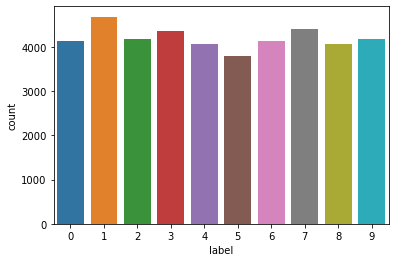

In [9]:
# Vilsualizing the distribution of the digits and getting the sum of each digit
print(dc_label.value_counts())
sns.countplot(dc_label)
labels = dc_label.value_counts()

In [10]:
# Calculating the standard deviation
std=np.std(labels)
# Calculating the mean/ average
mean=np.mean(labels)

print("The average amount of digits in the data set is: {0} and the standard diviation is: {1}".format(mean, std))

The average amount of digits in the data set is: 4200.0 and the standard diviation is: 224.92265337222037


In [11]:
# It is noticeable that there are fewer 5s in the data set and more 1s.

### Looking at the pixel-values and their frequency (0-black, 255-white)

Text(0, 0.5, 'Frequency')

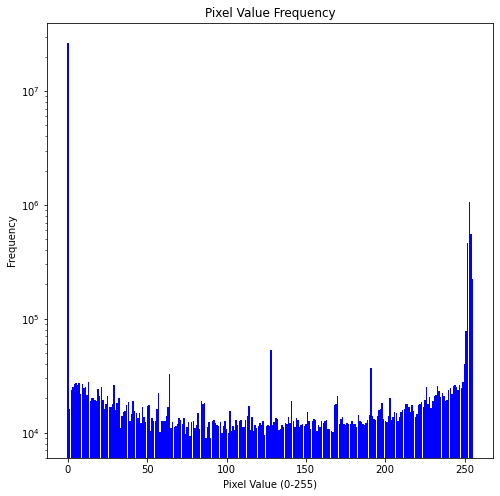

In [12]:
# Getting the pixel values, sorting them and then saving it to the y-varialbe(list) / which becomes the y axies
y = pd.value_counts(dc_train.values.ravel()).sort_index()
# Saving the length of the list
N = len(y)
# Defning the x-axies, so that every pixelvalue get's represented by a bar
x = range(N)
# Defining the size of the plot
width =0.9
plt.figure(figsize=[8,8])
# Creating the bar plot and description of the axes
plt.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

Most pixel values are at 0, which was to be expected since the numbers are white (Pixelvalue of 255) and the background is black (Pixelvalue of 0). It is visible that almost all pixel values are represented. Otherwise, there are no outliers or overshoots.

### Visualizing some arbitrary digits

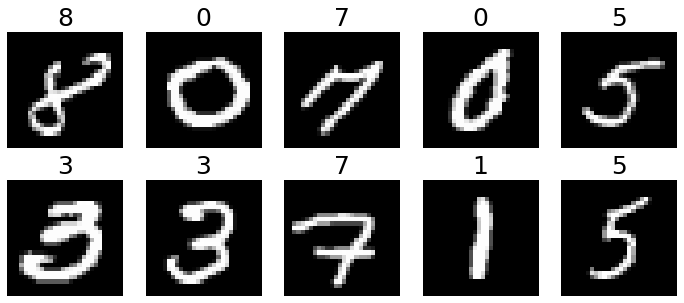

(42000, 784)


In [13]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,4199,size=10)
for i in range(10):
    # Converting 1D array to 2D 28x28 array using reshape, to plot and view the digits.
    axes[i].imshow(dc_train.iloc[idx[i],:].values.reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(dc_label[idx[i]])), color= 'black', fontsize=25)
plt.show()
print(dc_train.shape)

These digits look okay so far. However, when looking at several numbers (codecell refresh), there are some very indistinct handwritten numbers.

### Importing scikit-learn library to build and train the SVM and KNN models

In [14]:
from __future__ import print_function

from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [15]:
# Preprocessing the data by using the Standard scaler
scaler = StandardScaler()
# Transform the data
X_scaled = scaler.fit_transform(dc_train)
x_test = scaler.fit_transform(dc_test)

# Randomizing the training set into training- and testing-subset, because we know the outcome (label/digit)
X_train, Y_train, X_labels, Y_labels = train_test_split(X_scaled, dc_label, train_size=0.2, test_size=0.8, random_state=42)

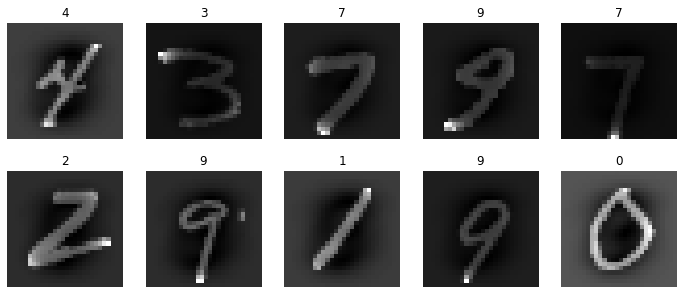

(33600, 784)


In [16]:
# Visualizing random digits after scaling
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,33599,size=10)
for i in range(10):
    axes[i].imshow(Y_train[idx[i],:].reshape(28, 28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(Y_labels.iloc[idx[i]])
plt.show()
print(Y_train.shape)

In [17]:
print('X_train shape:',X_train.shape)
print('X_labels shape:',X_labels.shape)
print('Y_train shape:',Y_train.shape)
print('Y_labels shape:',Y_labels.shape)

X_train shape: (8400, 784)
X_labels shape: (8400,)
Y_train shape: (33600, 784)
Y_labels shape: (33600,)


In [19]:
# The whole training-set consisted of 42.000 digits; now divided into 
# 80%=33.600=training-sbuset, 20%=8.400=training_test-subset

## Starting with the SVM models

### 1st try with a linear model:

In [41]:
# Setting up the model
model_linear = SVC(kernel='linear')

# Training the model
model_linear.fit(Y_train, Y_labels)

# Predicting the digits of the test-subset based on the previous training
x_pred = model_linear.predict(X_train)

In [42]:
# Visualizing and getting data of the outcome (confusion matrix, accuracy, precision, f1-score & recall)

# Calculation the accuracy
print("accuracy:", metrics.accuracy_score(y_true=X_labels, y_pred=x_pred), "\n")

# Visualizing the confusion matrix
print(metrics.confusion_matrix(y_true=X_labels, y_pred=x_pred))

accuracy: 0.9201190476190476 

[[778   0   3   2   2   4   6   0   3   0]
 [  0 900   3   1   3   2   1   3   7   0]
 [  3   8 729  19   9   4   5   4  15   1]
 [  3   3  18 788   1  20   0   3  14   8]
 [  1   2  19   0 761   1   1   5   2  21]
 [  6   6  10  38   1 685   2   1  17   6]
 [  7   4  17   2   9   8 801   0   1   0]
 [  3   4  12   5   9   1   0 857   1  37]
 [  9  22  17  22   7  22   6   8 693   4]
 [  5   2  11  11  46   4   1  33   4 737]]


In [43]:
# Getting precision, recall & f1-score

scores=metrics.classification_report(X_labels, x_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       798
           1       0.95      0.98      0.96       920
           2       0.87      0.91      0.89       797
           3       0.89      0.92      0.90       858
           4       0.90      0.94      0.92       813
           5       0.91      0.89      0.90       772
           6       0.97      0.94      0.96       849
           7       0.94      0.92      0.93       929
           8       0.92      0.86      0.88       810
           9       0.91      0.86      0.88       854

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



In [44]:
#  ≈ 92% accuracy/ weighted avg precision, refall & f1-score. 

### 2nd try with a non-linear and poly kernel approach

In [45]:
# Setting up the model
non_linear_model_poly = SVC(kernel='poly')

# Training the model
non_linear_model_poly.fit(Y_train, Y_labels)

# Predictiing the outcome based on test-subset
x_pred = non_linear_model_poly.predict(X_train)

In [46]:
# Visualizing and getting data of the outcome (confusion matrix, accuracy)

# Calculation the accuracy
print("accuracy:", metrics.accuracy_score(y_true=X_labels, y_pred=x_pred), "\n")

# Visualizing the confusion matrix
print(metrics.confusion_matrix(y_true=X_labels, y_pred=x_pred))

accuracy: 0.9519047619047619 

[[761   0   4   1   1   3   5   0  23   0]
 [  0 902   3   0   3   1   3   1   7   0]
 [  3   1 748   6   8   0   0   1  28   2]
 [  2   2   7 809   0  10   1   4  20   3]
 [  0   2   4   0 790   0   3   1   1  12]
 [  1   0   1   7   5 733   2   1  13   9]
 [  2   2   2   0   5   7 820   0  11   0]
 [  2   5   7   2  22   0   0 855   4  32]
 [  0   3   3   6   6   4   1   1 783   3]
 [  3   1   4   5  26   3   0   6  11 795]]


In [47]:
# Getting precision, recall & f1-score

scores=metrics.classification_report(X_labels, x_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       798
           1       0.98      0.98      0.98       920
           2       0.96      0.94      0.95       797
           3       0.97      0.94      0.96       858
           4       0.91      0.97      0.94       813
           5       0.96      0.95      0.96       772
           6       0.98      0.97      0.97       849
           7       0.98      0.92      0.95       929
           8       0.87      0.97      0.92       810
           9       0.93      0.93      0.93       854

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



In [48]:
# The accuracy, weighted avg precision, refall & f1-score ≈ 95% is the best so far. So let's try the Rbf-Kernal

### 3rd try with non-linear and rbf kernal approach

In [49]:
# Setting up the model
non_linear_model = SVC(kernel='rbf')

# Training the model
non_linear_model.fit(Y_train, Y_labels)

# Predictiing the outcome based on test-subset
x_pred = non_linear_model.predict(X_train)

In [50]:
# Visualizing and getting data of the outcome (confusion matrix, accuracy, precision & recall)

# Calculation the accuracy
print("accuracy:", metrics.accuracy_score(y_true=X_labels, y_pred=x_pred), "\n")

# Visualizing the confusion matrix
print(metrics.confusion_matrix(y_true=X_labels, y_pred=x_pred))

accuracy: 0.9592857142857143 

[[781   0   3   1   1   3   3   1   5   0]
 [  0 906   5   1   3   0   2   1   2   0]
 [  3   0 776   7   4   0   0   1   4   2]
 [  0   3  15 818   0   8   1   5   6   2]
 [  0   2   8   0 784   0   3   4   1  11]
 [  1   2   9  11   0 741   3   2   1   2]
 [  2   1  15   0   2   7 820   0   2   0]
 [  1   7  13   2   3   0   1 883   1  18]
 [  2   8   9   6   5   6   5   7 758   4]
 [  1   0  12   7  14   1   0  21   7 791]]


In [51]:
# Getting precision, recall & f1-score

scores=metrics.classification_report(X_labels, x_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       798
           1       0.98      0.98      0.98       920
           2       0.90      0.97      0.93       797
           3       0.96      0.95      0.96       858
           4       0.96      0.96      0.96       813
           5       0.97      0.96      0.96       772
           6       0.98      0.97      0.97       849
           7       0.95      0.95      0.95       929
           8       0.96      0.94      0.95       810
           9       0.95      0.93      0.94       854

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [52]:
#  ≈ 96% accuracy/ weighted avg precision, refall & f1-score is the best from the approaches above. 

### Doing PCA for dimension reduction before hyperparameter tuning

In [17]:
from sklearn.decomposition import PCA as sklearnPCA

Text(0, 0.5, 'Variance')

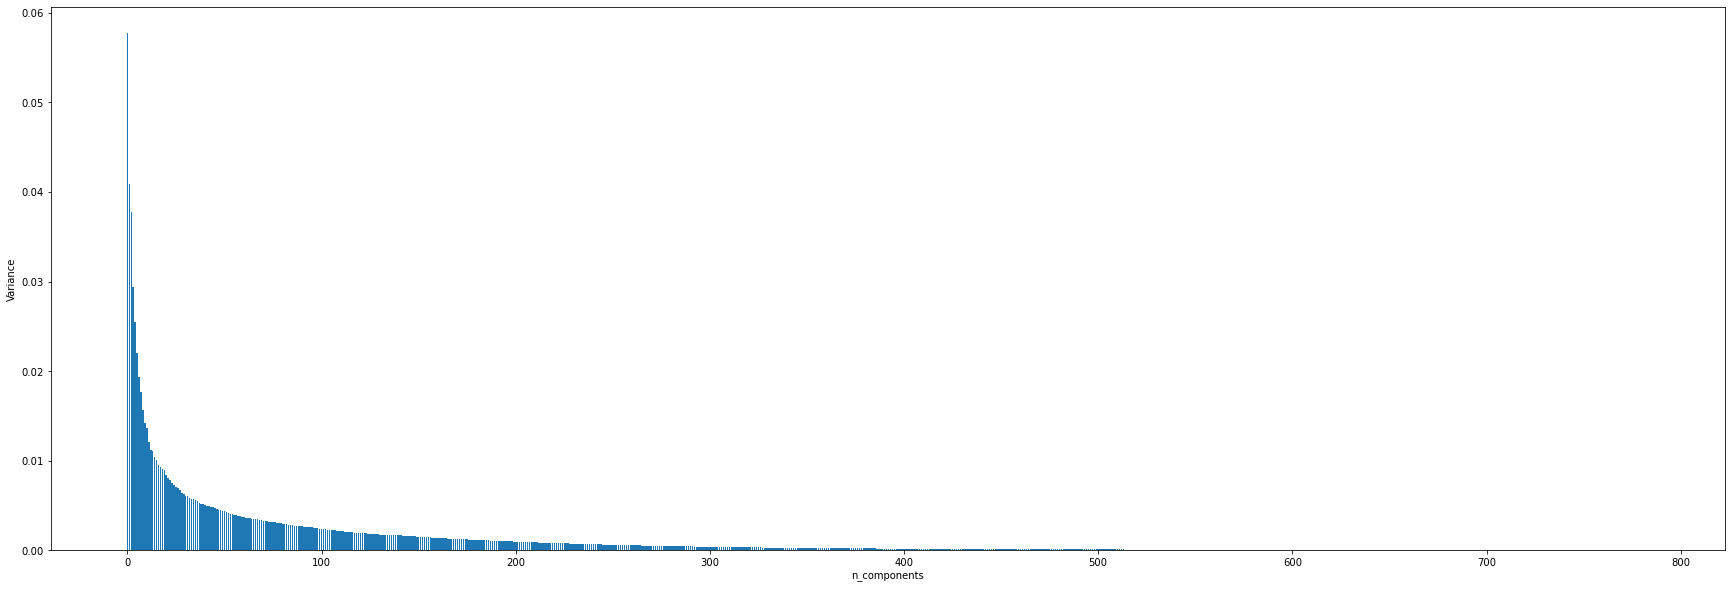

In [18]:
sklearn_pca = sklearnPCA().fit(Y_train)
X_train_pca = sklearnPCA().fit(X_train)
Y_train_pca = sklearnPCA().fit(Y_train)
X_test_pca = sklearnPCA().fit(x_test)

var_per = Y_train_pca.explained_variance_ratio_
cum_var_per = Y_train_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')

In [19]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca = sklearn_pca.fit_transform(Y_train)
test_pca = sklearn_pca.transform(X_train)
print("Shape before PCA for Train: ",X_train.shape)
print("Shape after PCA for Train: ",test_pca.shape)
print("Shape before PCA for Test: ",Y_train.shape)
print("Shape after PCA for Test: ",train_pca.shape)

Keeping 90% Info with  222  components
Shape before PCA for Train:  (8400, 784)
Shape after PCA for Train:  (8400, 222)
Shape before PCA for Test:  (33600, 784)
Shape after PCA for Test:  (33600, 222)


### Figuring out which hyperparmaters are optimal

In [20]:
# Hyperparameter tuning
# trying to find best gamma and C

hyper_params = {'gamma': [0.1, 0.01, 0.001],
             'C': [100, 10, 1]} 
# Setting up the rbf Kernel model
model = SVC(kernel= "rbf")

# Hyperparameter tuning with the GridSearch algorithm
model_cv = GridSearchCV(estimator = model,
                       param_grid = hyper_params,
                       verbose = 1,
                       return_train_score = True,
                        cv = 3,
                        n_jobs = -1)


# Training the model
model_cv.fit(train_pca, Y_labels)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [100, 10, 1], 'gamma': [0.1, 0.01, 0.001]},
             return_train_score=True, verbose=1)

In [21]:
# Let's see the results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,892.115734,2.497248,234.967564,2.817980,100,0.1,"{'C': 100, 'gamma': 0.1}",0.238661,0.236250,0.241250,0.238720,0.002042,7,1.000000,1.000000,1.000000,1.000000,0.000000
1,601.985136,3.547372,168.631569,2.177800,100,0.01,"{'C': 100, 'gamma': 0.01}",0.875982,0.878036,0.880089,0.878036,0.001677,4,1.000000,1.000000,1.000000,1.000000,0.000000
2,76.521596,0.162276,64.471250,0.752066,100,0.001,"{'C': 100, 'gamma': 0.001}",0.963482,0.963304,0.966250,0.964345,0.001349,2,1.000000,0.999866,0.999911,0.999926,0.000056
3,900.307456,4.796053,239.148610,2.701873,10,0.1,"{'C': 10, 'gamma': 0.1}",0.238661,0.236250,0.241250,0.238720,0.002042,7,1.000000,1.000000,1.000000,1.000000,0.000000
4,591.090310,5.436100,157.604215,4.296410,10,0.01,"{'C': 10, 'gamma': 0.01}",0.875982,0.878036,0.880089,0.878036,0.001677,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,71.189662,1.325977,62.327350,3.234713,10,0.001,"{'C': 10, 'gamma': 0.001}",0.964018,0.964018,0.966875,0.964970,0.001347,1,0.995179,0.995804,0.995982,0.995655,0.000345
6,663.080728,2.838121,124.037849,1.360731,1,0.1,"{'C': 1, 'gamma': 0.1}",0.220893,0.220625,0.225804,0.222440,0.002381,9,1.000000,1.000000,1.000000,1.000000,0.000000
7,484.634318,7.406392,103.126791,0.028165,1,0.01,"{'C': 1, 'gamma': 0.01}",0.865893,0.869107,0.869196,0.868065,0.001537,6,0.999018,0.999241,0.999062,0.999107,0.000096
8,88.742699,0.272657,68.809104,0.506704,1,0.001,"{'C': 1, 'gamma': 0.001}",0.953214,0.952589,0.955446,0.953750,0.001226,3,0.972946,0.974509,0.972277,0.973244,0.000935


In [22]:
# Getting the best score and the corresponding hyperparameters

best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameter {1}".format(best_score, best_hyperparams))

The best test score is 0.9649702380952382 corresponding to hyperparameter {'C': 10, 'gamma': 0.001}


In [56]:
# Now the optimal score and the hyperparameters are known, 
# so let's build up that model with the bigger training dataset

In [23]:
# Setting up the model
model_svc = SVC(C = 10, gamma = 0.001, kernel='rbf')

# Training the model
model_svc.fit(train_pca, Y_labels)

#Making a prediction on the training_test subset
x_pred = model_svc.predict(test_pca)

# Getting Accouracy and Confusion Matrix
print("accuracy", metrics.accuracy_score(X_labels, x_pred), "\n")
print(metrics.confusion_matrix(X_labels, x_pred), "\n")

accuracy 0.9720238095238095 

[[789   1   0   1   1   2   4   0   0   0]
 [  0 909   2   0   3   0   1   4   1   0]
 [  2   0 784   6   1   0   0   4   0   0]
 [  0   1   9 827   0   9   1   6   3   2]
 [  0   2   8   0 791   0   2   2   1   7]
 [  1   1   2   5   0 754   3   3   1   2]
 [  3   1   3   0   0   8 829   5   0   0]
 [  2   5   6   1   2   0   0 900   1  12]
 [  2   7   2   8   3   4   5   5 773   1]
 [  1   0   4   6  14   1   1  13   5 809]] 



In [24]:
# Getting precision, recall & f1-score
scores = metrics.classification_report(X_labels, x_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       798
           1       0.98      0.99      0.98       920
           2       0.96      0.98      0.97       797
           3       0.97      0.96      0.97       858
           4       0.97      0.97      0.97       813
           5       0.97      0.98      0.97       772
           6       0.98      0.98      0.98       849
           7       0.96      0.97      0.96       929
           8       0.98      0.95      0.97       810
           9       0.97      0.95      0.96       854

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [59]:
# With ≈ 97% accuracy/ weighted avg precision, refall & f1-score it is the best result so far. 
# Let's try different feature extractions

# Implementing KNN approach

In [60]:
print('X_train shape:',X_train.shape)
print('X_labels shape:',X_labels.shape)
print('Y_train shape:',Y_train.shape)
print('Y_labels shape:',Y_labels.shape)

X_train shape: (8400, 784)
X_labels shape: (8400,)
Y_train shape: (33600, 784)
Y_labels shape: (33600,)


In [61]:
# Setting up the hyperparameters by cross-validation
# I try out optimizing the neighours
# Other parameters that could be optimized: metric, weights
hyper_parameters = [{'n_neighbors': np.arange(1, 15, 2)}]

# Setting up the KNN model
model = KNeighborsClassifier()

             
# Setting up the GridSearchCV to find the optimal hyper_parameters
knn_model_cv = GridSearchCV(model, 
                            param_grid=hyper_parameters, 
                            return_train_score=True, 
                            verbose = 1,
                            cv = 5,
                            n_jobs=-1)

# Training the model
knn_model_cv.fit(Y_train, Y_labels)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13])}],
             return_train_score=True, verbose=1)

In [62]:
knn_model_cv_results = pd.DataFrame(knn_model_cv.cv_results_)
knn_model_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.285434,0.016988,54.266361,4.047319,1,{'n_neighbors': 1},0.934821,0.933631,0.933780,0.930952,...,0.933304,0.001278,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.272071,0.006658,54.957514,4.001142,3,{'n_neighbors': 3},0.937351,0.935417,0.933631,0.932292,...,0.935030,0.001846,1,0.964323,0.965625,0.965662,0.965885,0.965402,0.965379,0.000550
2,0.443813,0.159026,38.156590,14.824113,5,{'n_neighbors': 5},0.937351,0.932292,0.933036,0.926786,...,0.933214,0.003764,3,0.954241,0.955134,0.955022,0.955655,0.954353,0.954881,0.000524
3,0.342086,0.041989,31.761241,1.575579,7,{'n_neighbors': 7},0.937054,0.933036,0.931696,0.926042,...,0.932798,0.003907,4,0.947173,0.948363,0.948326,0.949591,0.946912,0.948073,0.000960
4,0.426061,0.138113,33.926278,4.027044,9,{'n_neighbors': 9},0.932292,0.930655,0.927381,0.924851,...,0.929881,0.003372,5,0.942857,0.942969,0.943527,0.944382,0.942448,0.943237,0.000669
5,0.600993,0.122117,34.698879,5.056828,11,{'n_neighbors': 11},0.931101,0.930060,0.926935,0.922917,...,0.928780,0.003512,6,0.938839,0.939993,0.939583,0.941220,0.938393,0.939606,0.000981
6,0.915060,0.767186,37.587836,6.901181,13,{'n_neighbors': 13},0.928571,0.927232,0.925595,0.918155,...,0.925804,0.004041,7,0.936384,0.936198,0.936942,0.937351,0.934524,0.936280,0.000968


In [63]:
# Getting the best accuracy and the corresponting hyperparameters

best_score = knn_model_cv.best_score_
best_hyperparams = knn_model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameter {1}".format(best_score, best_hyperparams))

The best test score is 0.9350297619047618 corresponding to hyperparameter {'n_neighbors': 3}


In [64]:
# Now we have the optimal amount of neighbours. Let's train the KNN model with n_neighbours = 3

In [65]:
# Setting up the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Training the model
knn_model.fit(Y_train, Y_labels)


#Making a prediction on the training_test subset
x_pred = knn_model.predict(X_train)

# Getting Accouracy and Confusion Matrix
print("accuracy", metrics.accuracy_score(X_labels, x_pred), "\n")
print(metrics.confusion_matrix(X_labels, x_pred), "\n")

accuracy 0.9398809523809524 

[[784   0   1   4   0   4   4   0   0   1]
 [  1 908   4   1   1   0   4   1   0   0]
 [  8   6 753  11   5   0   2   7   2   3]
 [  1   3  16 813   1  11   0   6   6   1]
 [  1   5   9   1 761   1   3   4   1  27]
 [  2   2   2  32   3 707   7   2   3  12]
 [  9   3   2   1   1   7 825   0   1   0]
 [  1  12   9   3   7   0   0 866   0  31]
 [ 11  17  13  21   8  26   5   4 699   6]
 [  6   1   4   4  22   4   0  32   2 779]] 



In [66]:
# Getting precision, recall & f1-score

scores = metrics.classification_report(X_labels, x_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       798
           1       0.95      0.99      0.97       920
           2       0.93      0.94      0.94       797
           3       0.91      0.95      0.93       858
           4       0.94      0.94      0.94       813
           5       0.93      0.92      0.92       772
           6       0.97      0.97      0.97       849
           7       0.94      0.93      0.94       929
           8       0.98      0.86      0.92       810
           9       0.91      0.91      0.91       854

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



In [67]:
# The accouracy, weighted avg precision, refall & f1-score of ≈ 94% is worse then the SVM model.

### Since the SVM/SVC model performed better than the KNN algorithm, I will submit the SVC algorithm to Kaggle.

In [68]:
# Saving the results of the predicted test-set
result = model_svc.predict(x_test)

In [69]:
# Creating a table with the Image ID's and the results
data_to_submit = pd.DataFrame({'ImageId': dc_test.index.values+1,
                              'Label':result})

data_to_submit.index=data_to_submit['ImageId'].values

data_to_submit.to_csv('result_dc.csv', index= False)

In [70]:
# Displaying the created table
data_to_submit.head()

,ImageId,Label
1,1,2
2,2,0
3,3,9
4,4,4
5,5,3


Codebases from: https://github.com/pramodini18/Digit-recognition-using-SVM/blob/master/Handwritten%20digit%20recognition%20using%20SVM.ipynb

https://www.kaggle.com/sabasiddiqi/svm-classification-parameter-selection-0-968

https://www.kaggle.com/upinderkahlon28/digit-recognizer